## Find the Source!

We have a fancy new flying robot equipped with a high-tech sensor that has excellent scent detection capabilities. However, the sensor consumes a significant amount of power and can only be used a handful of times before the robot needs to rest. Our task is to use this robot to uncover an object buried somewhere in a two-dimensional field [−1, 1] × [−1, 1]. 

An object buried somewhere in this field is emitting a strong scent that has spread across the entire field. While under normal conditions, the strength of the scent would diminish with distance, the ground of this field is filled with "pockets" that trap the scent and irregularities that affect the dispersion of the scent. Despite this, the location where the scent is most potent is where the object is buried. Therefore, the robot needs to search for the location of the object without getting misled by the localized pockets of scent.

The sensor provides a single numerical value indication of the scent's strength — the larger the number, the stronger the smell. We have an initial set of sensor readings as follows:

| X | Y | Sensor |
| --- | --- | --- |
| 0.1 | 0.05 | 3.39382006 |
| -0.9 | 0.3 | 3.2073034 |
| 0.2 | 0.4 | 3.39965035 |
| 0.8 | -0.3 | 3.68810201 |
| -0.6 | 0.3 | 2.96941623 |
| 0.3 | -0.2 | 2.99495501 |
| 0.5 | -0.84 | 3.94274928 |
| -0.5 | 0.85 | 2.7968011 |
| -0.01 | -0.76 | 3.34929734 |
| -0.9 | -0.9 | 3.91296165 |

From this initial data, we can begin to create a map indicating how the scent is dispersed across the field of play. We can also illustrate maps or other visuals of the uncertainty in the scent's strength or the object's location. 

Creating such maps will assist us in determining where to search next.

## Project 2a 

In [32]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import scipy.special as scispec
import scipy.optimize
import matplotlib.pyplot as plt
import sympy
from sympy.utilities.lambdify import lambdify
from scipy import optimize
from scipy.optimize import minimize


In [34]:
!pip install --upgrade scipy==1.4.1

In [35]:
def build_covariance(x, xp, y, yp, func, tau, L):
    """Build a covariance matrix
    
    Inputs
    -------
    x: (N) array of inputs
    xp: (M) array of inptus
    kern: a function mapping inputs to covariance
    
    Outputs
    -------
    cov: (N, M) covariance matrix
    """
    kern = func
    out = np.zeros((x.shape[0], xp.shape[0]))
    for jj in range(xp.shape[0]):
        out[:, jj] = kern(x, xp[jj], y, yp[jj], tau, L)
    return out

In [36]:
def sqexp(x, xp, y, yp, tau, L):
    """Squared exponential kernel (2 dimensional)
    
    Inputs
    ------
    x : (N), array of multiple inputs
    xp: float
    y : (N), array of multiple inputs
    yp: float
    
    Returns
    -------
    cov (N,) -- Covariance between each input at *x* and the function values at *x*
    """
    cov = tau**2 * np.exp(-1/2 * (x - xp)**2 / L**2)*tau**2 * np.exp(-1/2 * (y - yp)**2 / L**2)
    return cov

In [37]:
# constructing gridspace 
n_div = 50
x = np.linspace(-1, 1, n_div)
y = np.linspace(-1, 1, n_div)
xbar, ybar = np.meshgrid(x,y)
xbar_new = np.reshape(xbar,(n_div**2))
ybar_new = np.reshape(ybar,(n_div**2))
ybar_new = ybar_new.T
print(xbar_new.shape)
#print(xbar_new)
print(ybar_new.shape)
#print(ybar_new)

(2500,)
(2500,)


In [38]:
n_init = 10
xinit = np.array([0.1, -0.9, 0.2, 0.8, -0.6, 0.3, 0.5, -0.5, -0.01, -0.9])
xinit = xinit.T
yinit = np.array([0.05, 0.3, 0.4, -0.3, 0.3, -0.2, -0.84, 0.85, -0.76, -0.9])
yinit = yinit.T
sen_out = np.array([3.39382006, 3.2073034, 3.39965035, 3.68810201, 2.96941623, 2.99495501, 3.94274928, 2.7968011, 3.34929734, 3.91296165])
print((sen_out.T).shape)
sen_out_new = np.reshape(sen_out,(-1,1))
mean_func = np.mean(sen_out)*np.ones((n_init,1))
print(sen_out_new.shape)


(10,)
(10, 1)


In [39]:
def max_marg_likelihood(des_var):
    tau, L, sigma = des_var
    cov = build_covariance(xinit, xinit, yinit, yinit, sqexp, tau, L)
    mean_func = np.mean(sen_out)*np.ones((n_init,1))

    subterm_1 = (sen_out_new - mean_func).T
    subterm_2 = np.linalg.inv(cov + (sigma**2)*np.identity(xinit.shape[0]))
    subterm_3 = sen_out_new - mean_func
    
    term1 = np.dot(subterm_1,np.dot(subterm_2,subterm_3))
    term2 = np.log(np.linalg.det((cov + (sigma**2)*np.identity(xinit.shape[0]))))
    term3 = (n_init)*np.log(2*np.pi)
    
    mx_marg_lh = (1/2)*(term1 + term2 + term3)
    
    return mx_marg_lh
    

In [63]:
const = ((0,None),(0,None),(0,None))
results = scipy.optimize.minimize(max_marg_likelihood, (0.65, 0.45, 0.01), bounds = const)
#results = scipy.optimize.minimize(max_marg_likelihood, (0.95, 0.5, 0.01), bounds = const)
#results = scipy.optimize.minimize(max_marg_likelihood, (0.8, 0.5, 0.01), bounds = const)
#results = scipy.optimize.minimize(max_marg_likelihood, (0.7, 0.4, 0.01), bounds = const)
#results = scipy.optimize.minimize(max_marg_likelihood, (0.95, 0.5, 0.01), bounds = const)

print(results)


      fun: array([[4.06783639]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.30606678e-06, 1.24344979e-06, 1.77635684e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 92
      nit: 20
   status: 0
  success: True
        x: array([0.6156354 , 0.26413172, 0.        ])


In [41]:
def gpr(xinit, yinit, xpred, ypred, out_sensor, noise_var, mean_func, kernel, tau, L):
    """Gaussian process regression Algorithm

    Inputs
    -------
    xinit: (N, ) training inputs
    yinit: (N, ) training outputs
    xpred:  (M, ) locations at which to make predictions
    ypred:  (M, ) locations at which to make predictions
    noise_var: (N, ) noise at every training output
    mean_func: function to compute the prior mean
    kernel: covariance kernel
    
    Returns
    -------
    pred_mean : (M, ) predicted mean at prediction points
    pred_cov : (M, M) predicted covariance at the prediction points
    --
    """
    # constructing covariance matrix from initial datapoints given
    cov = build_covariance(xinit, xinit, yinit, yinit, kernel, tau, L) 
    u, s, v = np.linalg.svd(cov)
    sqrtcov = np.dot(u, np.sqrt(np.diag(s)))

    # pseudoinverse is better conditioned
    invcov = np.linalg.pinv(cov + np.diag(noise_var))
    mean_func = np.mean(sen_out)
    vec_pred = build_covariance(xpred, xinit, ypred, yinit, kernel, tau, L)
    print(vec_pred.shape)
    pred_mean = mean_func*np.ones(xpred.shape[0]) + np.matmul(vec_pred, np.matmul(invcov, out_sensor - mean_func))
    
    cov_predict_pre = build_covariance(xpred, xpred, ypred, ypred, kernel, tau, L)
    cov_predict_up = np.dot(vec_pred, np.dot(invcov, vec_pred.T))
    pred_cov = cov_predict_pre - cov_predict_up
    
    return pred_mean, pred_cov

In [42]:
tau = 6.15635315e-01
L = 2.64131426e-01
sigma = 1.01836023e-06
mean_func = np.mean(sen_out)*np.ones((n_init,1))
xinit = np.array([0.1, -0.9, 0.2, 0.8, -0.6, 0.3, 0.5, -0.5, -0.01, -0.9])
yinit = np.array([0.05, 0.3, 0.4, -0.3, 0.3, -0.2, -0.84, 0.85, -0.76, -0.9])
sen_out = np.array([3.39382006, 3.2073034, 3.39965035, 3.68810201, 2.96941623, 2.99495501, 3.94274928, 2.7968011, 3.34929734, 3.91296165])
sigma_opt = sigma * np.ones((xinit.shape[0])) 
mean_out, cov_out = gpr(xinit, yinit, xbar_new, ybar_new, sen_out, sigma_opt, mean_func, sqexp, tau, L)
print(mean_out)

(2500, 10)
[3.84000689 3.86259248 3.87394273 ... 3.3654187  3.36544956 3.36547045]


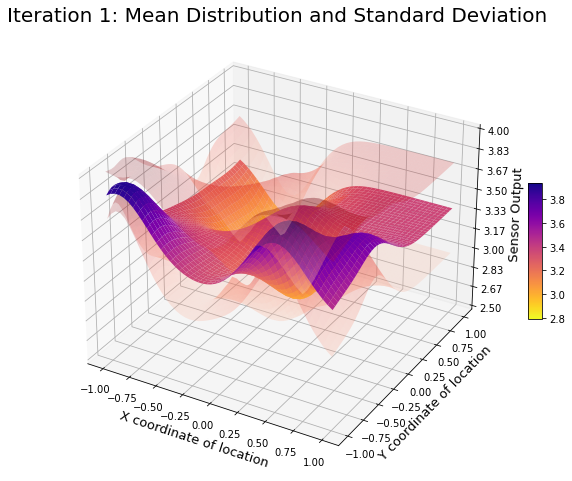

In [112]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,10))
# Plot the surface.
pred_mean = np.reshape(mean_out, (50,50))
#print(pred_mean)
mean = ax.plot_surface(xbar, ybar, pred_mean, cmap='plasma_r')
var = np.sqrt(np.diag(cov_out))
var_to_plot = np.reshape(var, (50,50))
#print(var_to_plot.shape)
#print(pred_mean.shape)
var_1 = ax.plot_surface(xbar, ybar, pred_mean + var_to_plot, cmap='Reds', alpha = 0.2)
var_2 = ax.plot_surface(xbar, ybar, pred_mean - var_to_plot, cmap='Reds', alpha = 0.2)
#
# Customize the z axis.
ax.set_zlim(2.5, 4)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_xlabel('X coordinate of location', fontsize = 13)
ax.set_ylabel('Y coordinate of location', fontsize = 13)
ax.set_zlabel('Sensor Output', fontsize = 13)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_title('Iteration 1: Mean Distribution and Standard Deviation', fontsize = 20)


# Add a color bar which maps values to colors.
fig.colorbar(mean, shrink=0.25, aspect=10)

plt.show()

In [104]:
# Finding the trace of the covariance matrix in order to find the variance of the distribution
# Covariance of an element with itself gives its variance 
# The diagonal of the covariance matrix represents the variances of all the elements with itself 
# The trace of the covariance matrix is the sum of diagonal elements 
#
# tau = 1.90872019
# L = 11.93990254
# sigma = 0.27930536

tau = 6.15635315e-01
L = 2.64131426e-01
sigma = 1.01836023e-06

def var_from_trace_1(points):
    
    x1,x2,x3,x4,y1,y2,y3,y4 = points
    xinit = np.array([0.1, -0.9, 0.2, 0.8, -0.6, 0.3, 0.5, -0.5, -0.01, -0.9, x1, x2, x3, x4])
    yinit = np.array([0.05, 0.3, 0.4, -0.3, 0.3, -0.2, -0.84, 0.85, -0.76, -0.9, y1, y2, y3, y4])
    
    sigma_new = sigma * np.ones((xinit.shape[0])) 
    # constructing covariance matrix from initial datapoints given
    cov = build_covariance(xinit, xinit, yinit, yinit, sqexp, tau, L) 
    u, s, v = np.linalg.svd(cov)
    sqrtcov = np.dot(u, np.sqrt(np.diag(s)))

    # pseudoinverse is better conditioned
    invcov = np.linalg.pinv(cov + np.diag(sigma_new))
    vec_pred = build_covariance(xbar_new, xinit, ybar_new, yinit, sqexp, tau, L)

    cov_predict_pre = build_covariance(xbar_new, xbar_new, ybar_new, ybar_new, sqexp, tau, L)
    cov_predict_up = np.dot(vec_pred, np.dot(invcov, vec_pred.T))
    pred_cov = cov_predict_pre - cov_predict_up

    var_dist = np.trace(pred_cov)

    return var_dist


In [114]:
const = ((-1,1),(-1,1),(-1,1),(-1,1),(-1,1),(-1,1),(-1,1),(-1,1))
results = scipy.optimize.minimize(var_from_trace_1, (0, 0, 0, 0, 0, 0, 0, 0), bounds = const)
print(results)

      fun: 159.12646040404
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.52953214e-04, -4.12114787e-04, -1.16529009e-04,  2.84217094e-05,
        2.67164069e-04, -1.19371180e-04,  3.72324394e-04,  1.81898940e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 468
      nit: 37
   status: 0
  success: True
        x: array([-0.77028974, -0.26354258, -0.47413339,  0.03540891, -0.25646705,
       -0.23566883, -0.70396699,  0.79324487])


[[0.03580318 0.02527739 0.01978343 ... 0.13534716 0.13866329 0.14078912]
 [0.02527719 0.01372404 0.00769384 ... 0.13381456 0.13772055 0.14022968]
 [0.01978297 0.00769358 0.00138348 ... 0.13245378 0.13685009 0.13968626]
 ...
 [0.1393667  0.13653245 0.13214999 ... 0.14364396 0.14364525 0.14364581]
 [0.14001111 0.1374611  0.13349939 ... 0.143645   0.14364569 0.14364598]
 [0.14062117 0.13843005 0.13501724 ... 0.14364558 0.14364593 0.14364608]]


Text(0, 0.5, 'Y coordinate of locations')

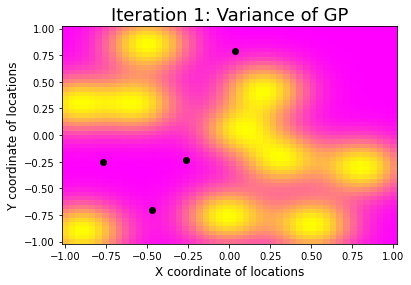

In [153]:
# n_div = 50
# x = np.linspace(-1, 1, n_div)
# y = np.linspace(-1, 1, n_div)
# xbar, ybar = np.meshgrid(x,y)
var = np.diag(cov_out)
var_to_plot = np.reshape(var, (50,50))
print(var_to_plot)
c = plt.pcolormesh(xbar,ybar,var_to_plot, cmap = "spring_r")
x_values = [(results.x[0],results.x[1],results.x[2],results.x[3])]
y_values = [(results.x[4],results.x[5],results.x[6],results.x[7])]
plt.scatter(x_values, y_values, c = 'black')
plt.title('Iteration 1: Variance of GP', fontsize = 18)
plt.xlabel('X coordinate of locations', fontsize = 12)
plt.ylabel('Y coordinate of locations', fontsize = 12)